<a href="https://colab.research.google.com/github/gpasxos/large-scale-optimization/blob/main/ch04_gradient_armijo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def backtracking_line_search(f, grad, x, alpha=0.3, beta=0.5):
    """
    Backtracking line search with Armijo condition.

    Parameters:
        f: objective function
        grad: gradient at x (precomputed)
        x: current point
        alpha: Armijo parameter (0.01-0.3 typical)
        beta: shrinkage factor (0.5-0.8 typical)

    Returns:
        eta: step size satisfying Armijo condition
    """
    eta = 1.0
    grad_norm_sq = np.dot(grad, grad)
    f_x = f(x)

    while f(x - eta * grad) > f_x - alpha * eta * grad_norm_sq:
        eta *= beta
        if eta < 1e-16: # Numerical safeguard
            break

    return eta

def gradient_descent(f, grad_f, x0, method='backtracking', eta=None, max_iter=1000, tol=1e-8):
    """
    Gradient descent with various step size strategies.

    Parameters:
        f: objective function
        grad_f: gradient function
        x0: initial point
        method: 'fixed', 'backtracking', or 'diminishing'
        eta: step size (for 'fixed') or initial scale (for 'diminishing')
        max_iter: maximum iterations
        tol: gradient norm tolerance for stopping

    Returns:
        x: final point
        history: dict with 'f', 'grad_norm', 'x' trajectories
    """
    x = np.array(x0, dtype=float)
    history = {'f': [f(x)], 'grad_norm': [], 'x': [x.copy()]}

    for k in range(max_iter):
        grad = grad_f(x)
        grad_norm = np.linalg.norm(grad)
        history['grad_norm'].append(grad_norm)

        if grad_norm < tol:
            break

        # Choose step size
        if method == 'fixed':
            step = eta
        elif method == 'backtracking':
            step = backtracking_line_search(f, grad, x)
        elif method == 'diminishing':
            step = eta / np.sqrt(k + 1)
        else:
            raise ValueError(f"Unknown method: {method}")

        # Update
        x = x - step * grad
        history['f'].append(f(x))
        history['x'].append(x.copy())

    return x, history


GRADIENT DESCENT STEP SIZE STRATEGIES: EDUCATIONAL EXPERIMENTS



EXPERIMENT 1: Ill-Conditioned Quadratic

Problem: f(x) = 0.5 * x^T Q x
Dimension: n = 20
Condition number: κ = 100
Smoothness constant: M = 100
Strong convexity: m = 1
Optimal step size (theory): η = 1/M = 0.0100

Initial function value: f(x0) = 320.2643

--- Running: Fixed step size (η = 1/M) ---
Final error: 2.29e-05

--- Running: Fixed step size (η = 0.1/M) ---
Final error: 2.11e-01

--- Running: Fixed step size (η = 1.5/M) ---
Final error: 1.17e-01

--- Running: Backtracking line search ---
Final error: 8.56e-11

--- Running: Diminishing step size (η_k = 1/√k) ---
Final error: nan


/tmp/ipython-input-4078874289.py:115: RuntimeWarning: overflow encountered in matmul
  f = lambda x: 0.5 * x @ Q @ x
/tmp/ipython-input-4078874289.py:116: RuntimeWarning: overflow encountered in matmul
  grad_f = lambda x: Q @ x
/tmp/ipython-input-4078874289.py:115: RuntimeWarning: invalid value encountered in matmul
  f = lambda x: 0.5 * x @ Q @ x
/tmp/ipython-input-4078874289.py:116: RuntimeWarning: invalid value encountered in matmul
  grad_f = lambda x: Q @ x
/tmp/ipython-input-4078874289.py:76: RuntimeWarning: invalid value encountered in subtract
  x = x - step * grad
/usr/local/lib/python3.12/dist-packages/matplotlib/scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


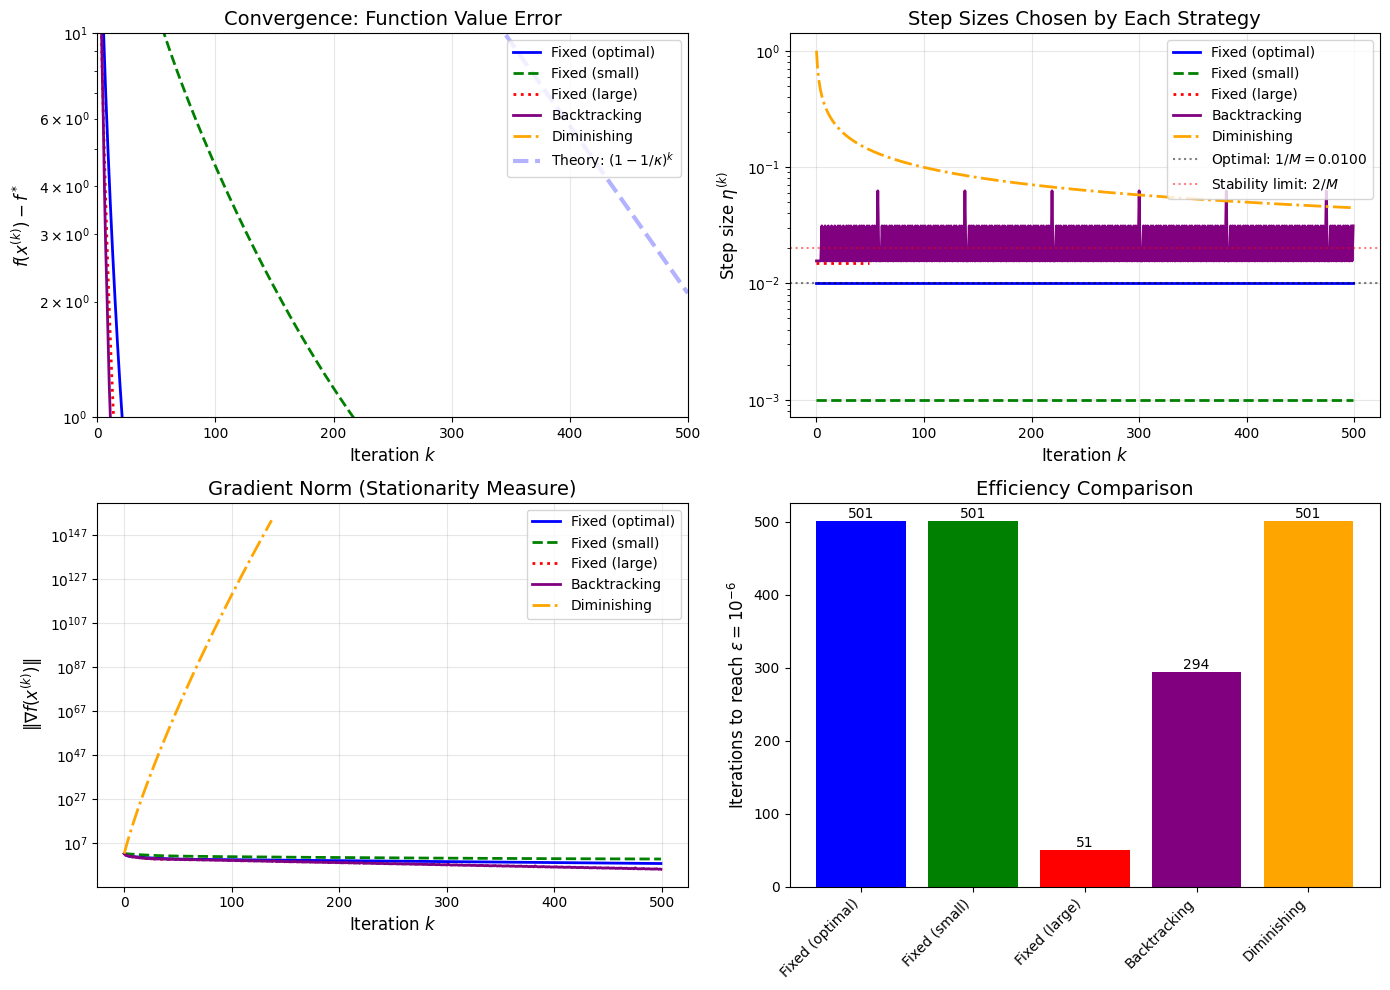


SUMMARY

Iterations to reach f(x) - f* < 10^-6:
  Fixed (optimal)     :  501 iterations
  Fixed (small)       :  501 iterations
  Fixed (large)       :   51 iterations
  Backtracking        :  294 iterations
  Diminishing         :  501 iterations




EXPERIMENT 2: Rosenbrock Function (Non-Convex)

Rosenbrock: f(x,y) = (1-x)² + 100(y-x²)²
Minimum at: x* = (1, 1), f* = 0
Starting point: x0 = [-1.  1.]
Initial value: f(x0) = 4.0000

--- Running: Fixed η = 0.001 ---
Final point: (0.9925, 0.9850)
Final error: 5.66e-05

--- Running: Fixed η = 0.0001 ---
Final point: (0.3634, 0.1291)
Final error: 4.06e-01

--- Running: Backtracking ---
Final point: (1.0000, 1.0000)
Final error: 0.00e+00


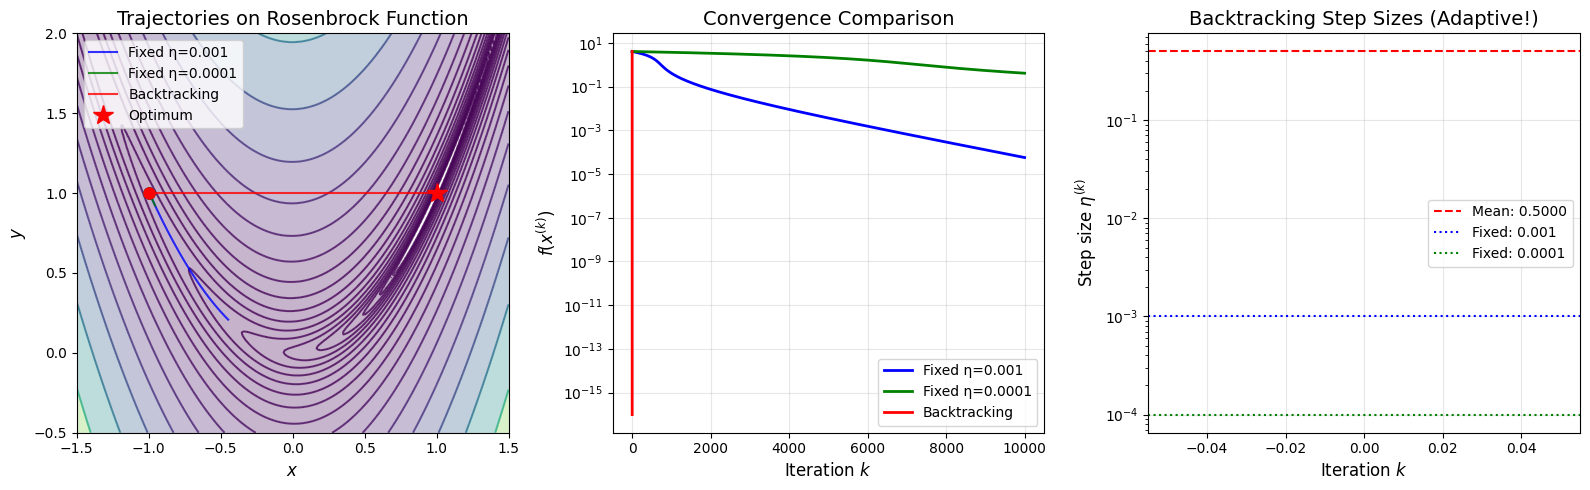





EXPERIMENT 3: Effect of Backtracking Parameters

Quadratic with κ = 50
Testing different (α, β) combinations...


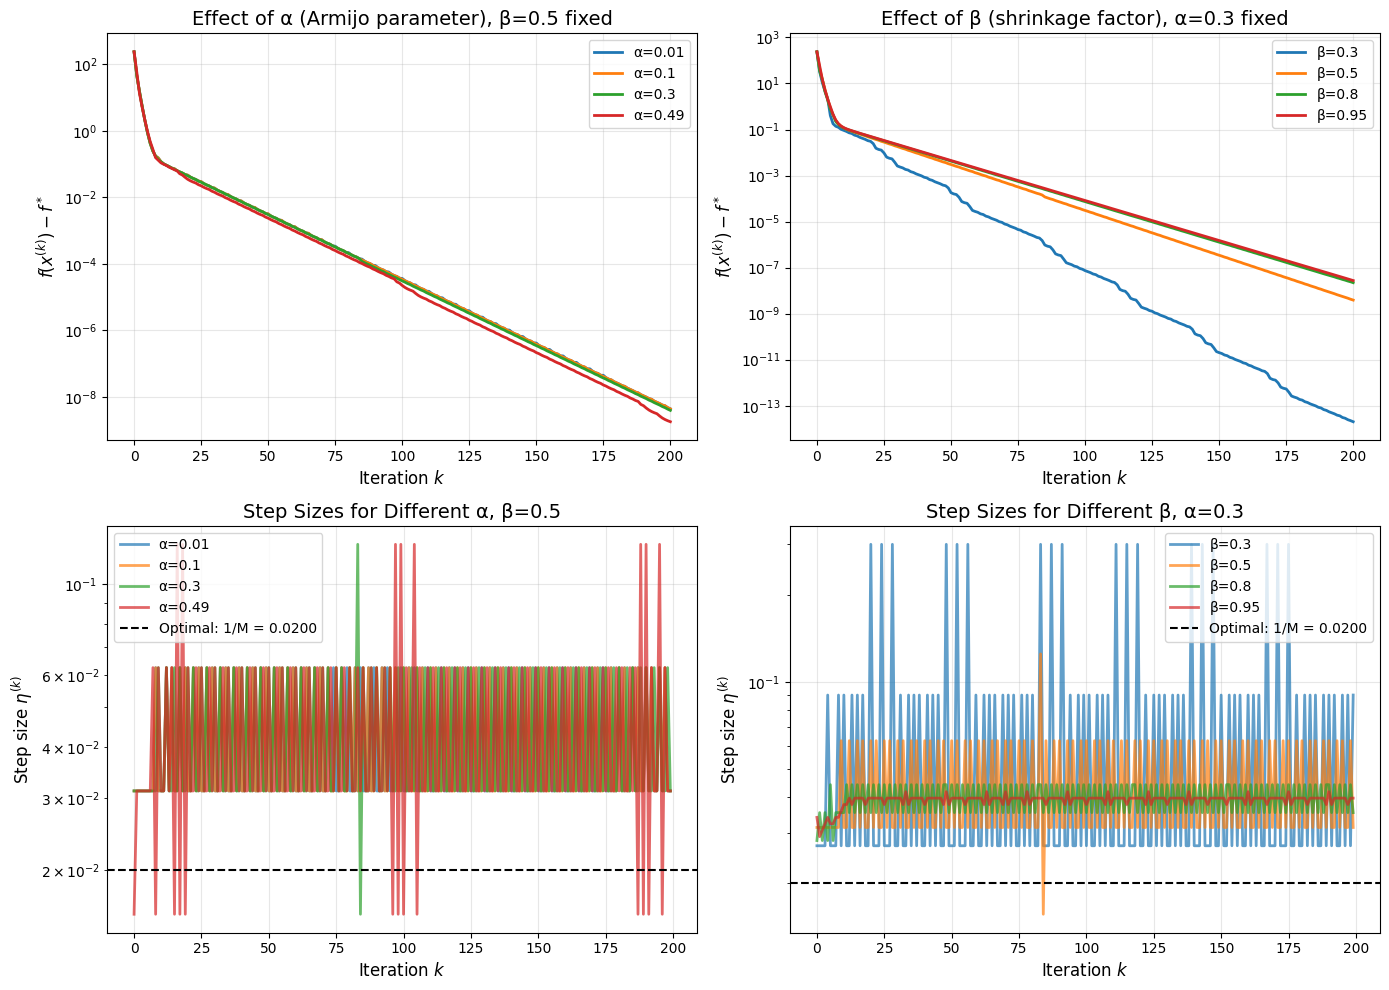


Key observations:
• Larger α → more conservative (requires more decrease)
• Smaller β → fewer backtracking iterations but coarser search
• Typical good choices: α ∈ [0.1, 0.3], β ∈ [0.5, 0.8]




EXPERIMENT 4: Logistic Regression

Logistic Regression:
  Samples: n = 1000
  Features: d = 50
  Estimated smoothness M ≈ 0.3709
  Suggested step size: 1/M ≈ 2.6961

--- Running: Fixed η=0.2696 ---
Final loss: 0.583888

--- Running: Fixed η=2.6961 ---
Final loss: 0.583888

--- Running: Fixed η=5.3922 ---
Final loss: 0.583888

--- Running: Fixed η=13.4805 ---
Final loss: 1.080364

--- Running: Backtracking ---
Final loss: 0.583888

--- Running: Diminishing ---
Final loss: 0.583888


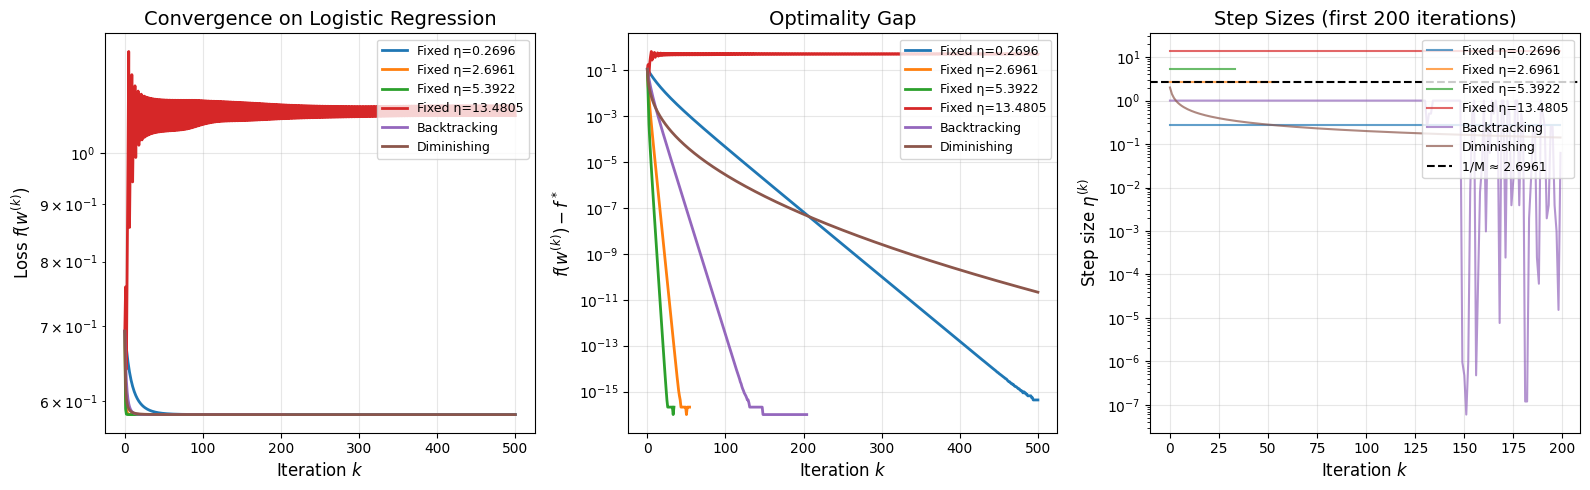


--- Classification Accuracy ---
Fixed η=0.2696                : 67.90%
Fixed η=2.6961                : 67.90%
Fixed η=5.3922                : 67.90%
Fixed η=13.4805               : 62.70%
Backtracking                  : 67.90%
Diminishing                   : 67.90%

KEY TAKEAWAYS

    1. FIXED STEP SIZE:
       ✓ Simple to implement
       ✓ Fast when η is well-tuned (η ≈ 1/M)
       ✗ Requires knowing smoothness constant M
       ✗ Too large → divergence; too small → slow
    
    2. BACKTRACKING LINE SEARCH:
       ✓ Adapts automatically to local curvature
       ✓ Robust without knowing M
       ✓ Often finds near-optimal step sizes
       ✗ Extra function evaluations per iteration
    
    3. DIMINISHING STEP SIZES:
       ✓ Guaranteed convergence (for convex functions)
       ✓ Useful for stochastic/noisy gradients
       ✗ Slower convergence than fixed/backtracking
       ✗ Requires tuning the initial scale
    
    RECOMMENDATIONS:
    • Know M → use fixed η = 1/M
    • Don't k

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Core Functions (from the chapter)
# ============================================================

def backtracking_line_search(f, grad, x, alpha=0.3, beta=0.5):
    """
    Backtracking line search with Armijo condition.

    Parameters:
        f: objective function
        grad: gradient at x (precomputed)
        x: current point
        alpha: Armijo parameter (0.01-0.3 typical)
        beta: shrinkage factor (0.5-0.8 typical)

    Returns:
        eta: step size satisfying Armijo condition
    """
    eta = 1.0
    grad_norm_sq = np.dot(grad, grad)
    f_x = f(x)

    while f(x - eta * grad) > f_x - alpha * eta * grad_norm_sq:
        eta *= beta
        if eta < 1e-16:  # Numerical safeguard
            break

    return eta


def gradient_descent(f, grad_f, x0, method='backtracking',
                     eta=None, max_iter=1000, tol=1e-8):
    """
    Gradient descent with various step size strategies.

    Parameters:
        f: objective function
        grad_f: gradient function
        x0: initial point
        method: 'fixed', 'backtracking', or 'diminishing'
        eta: step size (for 'fixed') or initial scale (for 'diminishing')
        max_iter: maximum iterations
        tol: gradient norm tolerance for stopping

    Returns:
        x: final point
        history: dict with 'f', 'grad_norm', 'x', 'step_sizes' trajectories
    """
    x = np.array(x0, dtype=float)
    history = {'f': [f(x)], 'grad_norm': [], 'x': [x.copy()], 'step_sizes': []}

    for k in range(max_iter):
        grad = grad_f(x)
        grad_norm = np.linalg.norm(grad)
        history['grad_norm'].append(grad_norm)

        if grad_norm < tol:
            break

        # Choose step size
        if method == 'fixed':
            step = eta
        elif method == 'backtracking':
            step = backtracking_line_search(f, grad, x)
        elif method == 'diminishing':
            step = eta / np.sqrt(k + 1)
        else:
            raise ValueError(f"Unknown method: {method}")

        history['step_sizes'].append(step)

        # Update
        x = x - step * grad
        history['f'].append(f(x))
        history['x'].append(x.copy())

    return x, history


# ============================================================
# Experiment 1: Ill-Conditioned Quadratic
# ============================================================
# This is the classic test case that reveals the importance of step size choice

def experiment_quadratic():
    """
    Compare step size strategies on an ill-conditioned quadratic.

    f(x) = 0.5 * x^T Q x, where Q has eigenvalues in [1, kappa]

    Key insights:
    - Fixed step size must be <= 1/L where L = max eigenvalue
    - Backtracking adapts automatically
    - Diminishing step sizes converge but slowly
    """
    print("=" * 60)
    print("EXPERIMENT 1: Ill-Conditioned Quadratic")
    print("=" * 60)

    # Problem setup
    n = 20
    kappa = 100  # Condition number
    np.random.seed(42)

    # Create a random quadratic with controlled condition number
    # Q = V @ diag(eigenvalues) @ V^T
    V, _ = np.linalg.qr(np.random.randn(n, n))  # Random orthogonal matrix
    eigenvalues = np.linspace(1, kappa, n)  # Eigenvalues from 1 to kappa
    Q = V @ np.diag(eigenvalues) @ V.T

    # Objective and gradient
    f = lambda x: 0.5 * x @ Q @ x
    grad_f = lambda x: Q @ x

    # Smoothness constant (largest eigenvalue)
    M = kappa
    m = 1  # Strong convexity constant (smallest eigenvalue)

    print(f"\nProblem: f(x) = 0.5 * x^T Q x")
    print(f"Dimension: n = {n}")
    print(f"Condition number: κ = {kappa}")
    print(f"Smoothness constant: M = {M}")
    print(f"Strong convexity: m = {m}")
    print(f"Optimal step size (theory): η = 1/M = {1/M:.4f}")

    # Starting point
    x0 = np.random.randn(n)
    f_star = 0  # Minimum value (at x* = 0)

    print(f"\nInitial function value: f(x0) = {f(x0):.4f}")

    # Run different strategies
    max_iter = 500
    results = {}

    # Strategy 1: Fixed step size (optimal)
    print("\n--- Running: Fixed step size (η = 1/M) ---")
    x_opt, hist_opt = gradient_descent(f, grad_f, x0, method='fixed',
                                        eta=1/M, max_iter=max_iter)
    results['Fixed (optimal)'] = hist_opt
    print(f"Final error: {f(x_opt) - f_star:.2e}")

    # Strategy 2: Fixed step size (too small - conservative)
    print("\n--- Running: Fixed step size (η = 0.1/M) ---")
    x_small, hist_small = gradient_descent(f, grad_f, x0, method='fixed',
                                            eta=0.1/M, max_iter=max_iter)
    results['Fixed (small)'] = hist_small
    print(f"Final error: {f(x_small) - f_star:.2e}")

    # Strategy 3: Fixed step size (too large - aggressive)
    print("\n--- Running: Fixed step size (η = 1.5/M) ---")
    x_large, hist_large = gradient_descent(f, grad_f, x0, method='fixed',
                                            eta=1.5/M, max_iter=min(50, max_iter))
    results['Fixed (large)'] = hist_large
    print(f"Final error: {f(x_large) - f_star:.2e}")

    # Strategy 4: Backtracking line search
    print("\n--- Running: Backtracking line search ---")
    x_bt, hist_bt = gradient_descent(f, grad_f, x0, method='backtracking',
                                      max_iter=max_iter)
    results['Backtracking'] = hist_bt
    print(f"Final error: {f(x_bt) - f_star:.2e}")

    # Strategy 5: Diminishing step size
    print("\n--- Running: Diminishing step size (η_k = 1/√k) ---")
    x_dim, hist_dim = gradient_descent(f, grad_f, x0, method='diminishing',
                                        eta=1.0, max_iter=max_iter)
    results['Diminishing'] = hist_dim
    print(f"Final error: {f(x_dim) - f_star:.2e}")

    # Plotting
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Plot 1: Convergence (function value)
    ax1 = axes[0, 0]
    colors = {'Fixed (optimal)': 'blue', 'Fixed (small)': 'green',
              'Fixed (large)': 'red', 'Backtracking': 'purple',
              'Diminishing': 'orange'}
    linestyles = {'Fixed (optimal)': '-', 'Fixed (small)': '--',
                  'Fixed (large)': ':', 'Backtracking': '-',
                  'Diminishing': '-.'}

    for name, hist in results.items():
        errors = [fval - f_star for fval in hist['f']]
        ax1.semilogy(errors, color=colors[name], linestyle=linestyles[name],
                     linewidth=2, label=name)

    # Add theoretical rate for optimal fixed step
    k = np.arange(len(results['Fixed (optimal)']['f']))
    rate = (1 - 1/kappa)
    theoretical = (results['Fixed (optimal)']['f'][0] - f_star) * rate**k
    ax1.semilogy(theoretical, 'b--', alpha=0.3, linewidth=3,
                 label=f'Theory: $(1-1/κ)^k$')

    ax1.set_xlabel('Iteration $k$', fontsize=12)
    ax1.set_ylabel('$f(x^{(k)}) - f^*$', fontsize=12)
    ax1.set_title('Convergence: Function Value Error', fontsize=14)
    ax1.legend(loc='upper right')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim([0, max_iter])

    # Plot 2: Step sizes over iterations
    ax2 = axes[0, 1]
    for name, hist in results.items():
        if len(hist['step_sizes']) > 0:
            ax2.semilogy(hist['step_sizes'], color=colors[name],
                        linestyle=linestyles[name], linewidth=2, label=name)

    ax2.axhline(y=1/M, color='black', linestyle=':', alpha=0.5,
                label=f'Optimal: $1/M = {1/M:.4f}$')
    ax2.axhline(y=2/M, color='red', linestyle=':', alpha=0.5,
                label=f'Stability limit: $2/M$')
    ax2.set_xlabel('Iteration $k$', fontsize=12)
    ax2.set_ylabel('Step size $η^{(k)}$', fontsize=12)
    ax2.set_title('Step Sizes Chosen by Each Strategy', fontsize=14)
    ax2.legend(loc='upper right')
    ax2.grid(True, alpha=0.3)

    # Plot 3: Gradient norm
    ax3 = axes[1, 0]
    for name, hist in results.items():
        ax3.semilogy(hist['grad_norm'], color=colors[name],
                     linestyle=linestyles[name], linewidth=2, label=name)

    ax3.set_xlabel('Iteration $k$', fontsize=12)
    ax3.set_ylabel('$\\|\\nabla f(x^{(k)})\\|$', fontsize=12)
    ax3.set_title('Gradient Norm (Stationarity Measure)', fontsize=14)
    ax3.legend(loc='upper right')
    ax3.grid(True, alpha=0.3)

    # Plot 4: Summary bar chart - iterations to reach tolerance
    ax4 = axes[1, 1]
    tol = 1e-6
    iters_to_converge = {}
    for name, hist in results.items():
        errors = [fval - f_star for fval in hist['f']]
        reached = [i for i, e in enumerate(errors) if e < tol]
        iters_to_converge[name] = reached[0] if reached else len(errors)

    names = list(iters_to_converge.keys())
    iters = list(iters_to_converge.values())
    bars = ax4.bar(range(len(names)), iters, color=[colors[n] for n in names])
    ax4.set_xticks(range(len(names)))
    ax4.set_xticklabels(names, rotation=45, ha='right')
    ax4.set_ylabel('Iterations to reach $\\epsilon = 10^{-6}$', fontsize=12)
    ax4.set_title('Efficiency Comparison', fontsize=14)

    # Add value labels on bars
    for bar, val in zip(bars, iters):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{val}', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.savefig('step_size_comparison_quadratic.pdf', bbox_inches='tight', dpi=150)
    plt.show()

    # Print summary
    print("\n" + "=" * 60)
    print("SUMMARY")
    print("=" * 60)
    print(f"\nIterations to reach f(x) - f* < 10^-6:")
    for name, iters in iters_to_converge.items():
        print(f"  {name:20s}: {iters:4d} iterations")

    return results


# ============================================================
# Experiment 2: Rosenbrock Function (Non-convex)
# ============================================================

def experiment_rosenbrock():
    """
    Compare step size strategies on the Rosenbrock function.

    f(x,y) = (1-x)^2 + 100(y-x^2)^2

    This is a classic non-convex test function with a curved valley.
    The minimum is at (1, 1) with f* = 0.

    Key insights:
    - Backtracking is crucial for navigating the curved valley
    - Fixed step sizes often fail or oscillate
    - Visualizes nicely in 2D
    """
    print("\n" + "=" * 60)
    print("EXPERIMENT 2: Rosenbrock Function (Non-Convex)")
    print("=" * 60)

    # Rosenbrock function
    def f(x):
        return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

    def grad_f(x):
        dfdx = -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2)
        dfdy = 200*(x[1] - x[0]**2)
        return np.array([dfdx, dfdy])

    # Starting point
    x0 = np.array([-1.0, 1.0])
    f_star = 0
    x_star = np.array([1.0, 1.0])

    print(f"\nRosenbrock: f(x,y) = (1-x)² + 100(y-x²)²")
    print(f"Minimum at: x* = (1, 1), f* = 0")
    print(f"Starting point: x0 = {x0}")
    print(f"Initial value: f(x0) = {f(x0):.4f}")

    # Run different strategies
    max_iter = 10000
    results = {}

    # Fixed step sizes
    for eta in [0.001, 0.0001]:
        print(f"\n--- Running: Fixed η = {eta} ---")
        try:
            x_final, hist = gradient_descent(f, grad_f, x0, method='fixed',
                                              eta=eta, max_iter=max_iter, tol=1e-8)
            results[f'Fixed η={eta}'] = hist
            print(f"Final point: ({x_final[0]:.4f}, {x_final[1]:.4f})")
            print(f"Final error: {f(x_final):.2e}")
        except:
            print("Diverged!")

    # Backtracking
    print("\n--- Running: Backtracking ---")
    x_bt, hist_bt = gradient_descent(f, grad_f, x0, method='backtracking',
                                      max_iter=max_iter, tol=1e-8)
    results['Backtracking'] = hist_bt
    print(f"Final point: ({x_bt[0]:.4f}, {x_bt[1]:.4f})")
    print(f"Final error: {f(x_bt):.2e}")

    # Plotting
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))

    # Plot 1: Contour plot with trajectories
    ax1 = axes[0]

    # Create contour plot
    x_range = np.linspace(-1.5, 1.5, 200)
    y_range = np.linspace(-0.5, 2.0, 200)
    X, Y = np.meshgrid(x_range, y_range)
    Z = (1 - X)**2 + 100 * (Y - X**2)**2

    # Log scale for contours to see the valley better
    levels = np.logspace(-1, 3, 20)
    ax1.contour(X, Y, Z, levels=levels, cmap='viridis', alpha=0.7)
    ax1.contourf(X, Y, Z, levels=levels, cmap='viridis', alpha=0.3)

    # Plot trajectories
    colors = {'Fixed η=0.001': 'blue', 'Fixed η=0.0001': 'green',
              'Backtracking': 'red'}

    for name, hist in results.items():
        traj = np.array(hist['x'])
        # Only plot first 500 points for clarity
        traj = traj[:500]
        ax1.plot(traj[:, 0], traj[:, 1], '-', color=colors.get(name, 'gray'),
                linewidth=1.5, label=name, alpha=0.8)
        ax1.plot(traj[0, 0], traj[0, 1], 'o', color=colors.get(name, 'gray'),
                markersize=8)

    ax1.plot(1, 1, 'r*', markersize=15, label='Optimum')
    ax1.set_xlabel('$x$', fontsize=12)
    ax1.set_ylabel('$y$', fontsize=12)
    ax1.set_title('Trajectories on Rosenbrock Function', fontsize=14)
    ax1.legend(loc='upper left')
    ax1.set_xlim([-1.5, 1.5])
    ax1.set_ylim([-0.5, 2.0])

    # Plot 2: Convergence
    ax2 = axes[1]
    for name, hist in results.items():
        errors = [max(fval, 1e-16) for fval in hist['f']]  # Avoid log(0)
        ax2.semilogy(errors, color=colors.get(name, 'gray'), linewidth=2, label=name)

    ax2.set_xlabel('Iteration $k$', fontsize=12)
    ax2.set_ylabel('$f(x^{(k)})$', fontsize=12)
    ax2.set_title('Convergence Comparison', fontsize=14)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Plot 3: Step sizes for backtracking
    ax3 = axes[2]
    if 'Backtracking' in results:
        steps = results['Backtracking']['step_sizes'][:500]
        ax3.semilogy(steps, 'r-', linewidth=1, alpha=0.7)
        ax3.axhline(y=np.mean(steps), color='red', linestyle='--',
                    label=f'Mean: {np.mean(steps):.4f}')

    # Show fixed step sizes for comparison
    ax3.axhline(y=0.001, color='blue', linestyle=':', label='Fixed: 0.001')
    ax3.axhline(y=0.0001, color='green', linestyle=':', label='Fixed: 0.0001')

    ax3.set_xlabel('Iteration $k$', fontsize=12)
    ax3.set_ylabel('Step size $η^{(k)}$', fontsize=12)
    ax3.set_title('Backtracking Step Sizes (Adaptive!)', fontsize=14)
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('step_size_comparison_rosenbrock.pdf', bbox_inches='tight', dpi=150)
    plt.show()

    return results


# ============================================================
# Experiment 3: Effect of Backtracking Parameters
# ============================================================

def experiment_backtracking_params():
    """
    Study how backtracking parameters (α, β) affect performance.

    - α (Armijo parameter): How much decrease we require (0 < α < 0.5)
    - β (shrinkage factor): How much we shrink step size (0 < β < 1)

    Key insights:
    - α too large → overly conservative (small steps)
    - α too small → accepts poor steps
    - β close to 1 → many shrinkage iterations
    - β close to 0 → large jumps in step size
    """
    print("\n" + "=" * 60)
    print("EXPERIMENT 3: Effect of Backtracking Parameters")
    print("=" * 60)

    # Simple quadratic for clear analysis
    n = 10
    kappa = 50
    np.random.seed(123)

    V, _ = np.linalg.qr(np.random.randn(n, n))
    eigenvalues = np.linspace(1, kappa, n)
    Q = V @ np.diag(eigenvalues) @ V.T

    f = lambda x: 0.5 * x @ Q @ x
    grad_f = lambda x: Q @ x

    x0 = np.random.randn(n)
    f_star = 0
    max_iter = 200

    print(f"\nQuadratic with κ = {kappa}")
    print(f"Testing different (α, β) combinations...")

    # Test different parameter combinations
    alpha_values = [0.01, 0.1, 0.3, 0.49]
    beta_values = [0.3, 0.5, 0.8, 0.95]

    results = {}

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Vary α with fixed β
    ax1 = axes[0, 0]
    beta_fixed = 0.5
    for alpha in alpha_values:
        def gd_with_params(f, grad_f, x0, alpha, beta, max_iter):
            x = np.array(x0, dtype=float)
            history = {'f': [f(x)], 'step_sizes': []}

            for k in range(max_iter):
                grad = grad_f(x)
                if np.linalg.norm(grad) < 1e-10:
                    break

                # Custom backtracking with given parameters
                eta = 1.0
                grad_norm_sq = np.dot(grad, grad)
                f_x = f(x)

                while f(x - eta * grad) > f_x - alpha * eta * grad_norm_sq:
                    eta *= beta
                    if eta < 1e-16:
                        break

                history['step_sizes'].append(eta)
                x = x - eta * grad
                history['f'].append(f(x))

            return x, history

        _, hist = gd_with_params(f, grad_f, x0, alpha, beta_fixed, max_iter)
        errors = [fval - f_star for fval in hist['f']]
        ax1.semilogy(errors, linewidth=2, label=f'α={alpha}')

    ax1.set_xlabel('Iteration $k$', fontsize=12)
    ax1.set_ylabel('$f(x^{(k)}) - f^*$', fontsize=12)
    ax1.set_title(f'Effect of α (Armijo parameter), β={beta_fixed} fixed', fontsize=14)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Vary β with fixed α
    ax2 = axes[0, 1]
    alpha_fixed = 0.3
    for beta in beta_values:
        def gd_with_params(f, grad_f, x0, alpha, beta, max_iter):
            x = np.array(x0, dtype=float)
            history = {'f': [f(x)], 'step_sizes': []}

            for k in range(max_iter):
                grad = grad_f(x)
                if np.linalg.norm(grad) < 1e-10:
                    break

                eta = 1.0
                grad_norm_sq = np.dot(grad, grad)
                f_x = f(x)

                while f(x - eta * grad) > f_x - alpha * eta * grad_norm_sq:
                    eta *= beta
                    if eta < 1e-16:
                        break

                history['step_sizes'].append(eta)
                x = x - eta * grad
                history['f'].append(f(x))

            return x, history

        _, hist = gd_with_params(f, grad_f, x0, alpha_fixed, beta, max_iter)
        errors = [fval - f_star for fval in hist['f']]
        ax2.semilogy(errors, linewidth=2, label=f'β={beta}')

    ax2.set_xlabel('Iteration $k$', fontsize=12)
    ax2.set_ylabel('$f(x^{(k)}) - f^*$', fontsize=12)
    ax2.set_title(f'Effect of β (shrinkage factor), α={alpha_fixed} fixed', fontsize=14)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Step sizes for different α
    ax3 = axes[1, 0]
    for alpha in alpha_values:
        def gd_with_params(f, grad_f, x0, alpha, beta, max_iter):
            x = np.array(x0, dtype=float)
            history = {'f': [f(x)], 'step_sizes': []}

            for k in range(max_iter):
                grad = grad_f(x)
                if np.linalg.norm(grad) < 1e-10:
                    break

                eta = 1.0
                grad_norm_sq = np.dot(grad, grad)
                f_x = f(x)

                while f(x - eta * grad) > f_x - alpha * eta * grad_norm_sq:
                    eta *= beta
                    if eta < 1e-16:
                        break

                history['step_sizes'].append(eta)
                x = x - eta * grad
                history['f'].append(f(x))

            return x, history

        _, hist = gd_with_params(f, grad_f, x0, alpha, beta_fixed, max_iter)
        ax3.semilogy(hist['step_sizes'], linewidth=2, alpha=0.7, label=f'α={alpha}')

    ax3.axhline(y=1/kappa, color='black', linestyle='--',
                label=f'Optimal: 1/M = {1/kappa:.4f}')
    ax3.set_xlabel('Iteration $k$', fontsize=12)
    ax3.set_ylabel('Step size $η^{(k)}$', fontsize=12)
    ax3.set_title(f'Step Sizes for Different α, β={beta_fixed}', fontsize=14)
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Step sizes for different β
    ax4 = axes[1, 1]
    for beta in beta_values:
        def gd_with_params(f, grad_f, x0, alpha, beta, max_iter):
            x = np.array(x0, dtype=float)
            history = {'f': [f(x)], 'step_sizes': []}

            for k in range(max_iter):
                grad = grad_f(x)
                if np.linalg.norm(grad) < 1e-10:
                    break

                eta = 1.0
                grad_norm_sq = np.dot(grad, grad)
                f_x = f(x)

                while f(x - eta * grad) > f_x - alpha * eta * grad_norm_sq:
                    eta *= beta
                    if eta < 1e-16:
                        break

                history['step_sizes'].append(eta)
                x = x - eta * grad
                history['f'].append(f(x))

            return x, history

        _, hist = gd_with_params(f, grad_f, x0, alpha_fixed, beta, max_iter)
        ax4.semilogy(hist['step_sizes'], linewidth=2, alpha=0.7, label=f'β={beta}')

    ax4.axhline(y=1/kappa, color='black', linestyle='--',
                label=f'Optimal: 1/M = {1/kappa:.4f}')
    ax4.set_xlabel('Iteration $k$', fontsize=12)
    ax4.set_ylabel('Step size $η^{(k)}$', fontsize=12)
    ax4.set_title(f'Step Sizes for Different β, α={alpha_fixed}', fontsize=14)
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('backtracking_parameters.pdf', bbox_inches='tight', dpi=150)
    plt.show()

    print("\nKey observations:")
    print("• Larger α → more conservative (requires more decrease)")
    print("• Smaller β → fewer backtracking iterations but coarser search")
    print("• Typical good choices: α ∈ [0.1, 0.3], β ∈ [0.5, 0.8]")


# ============================================================
# Experiment 4: Logistic Regression (Practical ML Example)
# ============================================================

def experiment_logistic_regression():
    """
    Compare step size strategies on logistic regression.

    This is a practical machine learning example:
    f(w) = (1/n) Σ log(1 + exp(-y_i * a_i^T w))

    Key insights:
    - Backtracking is robust without knowing M
    - Fixed step size requires tuning
    - Problem structure affects optimal step size
    """
    print("\n" + "=" * 60)
    print("EXPERIMENT 4: Logistic Regression")
    print("=" * 60)

    # Generate synthetic classification data
    np.random.seed(42)
    n_samples = 1000
    n_features = 50

    # Generate features
    X = np.random.randn(n_samples, n_features)

    # True weights
    w_true = np.random.randn(n_features)
    w_true = w_true / np.linalg.norm(w_true)

    # Generate labels with some noise
    probs = 1 / (1 + np.exp(-X @ w_true))
    y = 2 * (np.random.rand(n_samples) < probs) - 1  # Labels in {-1, +1}

    print(f"\nLogistic Regression:")
    print(f"  Samples: n = {n_samples}")
    print(f"  Features: d = {n_features}")

    # Logistic loss and gradient
    def sigmoid(z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def f(w):
        margins = y * (X @ w)
        return np.mean(np.log(1 + np.exp(-margins)))

    def grad_f(w):
        margins = y * (X @ w)
        weights = -y * (1 - sigmoid(margins))
        return X.T @ weights / n_samples

    # Estimate smoothness constant
    # For logistic regression: M <= ||X||^2 / (4n)
    M_estimate = np.linalg.norm(X, ord=2)**2 / (4 * n_samples)
    print(f"  Estimated smoothness M ≈ {M_estimate:.4f}")
    print(f"  Suggested step size: 1/M ≈ {1/M_estimate:.4f}")

    # Starting point
    w0 = np.zeros(n_features)
    max_iter = 500

    results = {}

    # Fixed step sizes
    for eta_factor in [0.1, 1.0, 2.0, 5.0]:
        eta = eta_factor / M_estimate
        name = f'Fixed η={eta:.4f}'
        print(f"\n--- Running: {name} ---")
        try:
            w_final, hist = gradient_descent(f, grad_f, w0, method='fixed',
                                              eta=eta, max_iter=max_iter, tol=1e-10)
            results[name] = hist
            print(f"Final loss: {hist['f'][-1]:.6f}")
        except Exception as e:
            print(f"Failed: {e}")

    # Backtracking
    print("\n--- Running: Backtracking ---")
    w_bt, hist_bt = gradient_descent(f, grad_f, w0, method='backtracking',
                                      max_iter=max_iter, tol=1e-10)
    results['Backtracking'] = hist_bt
    print(f"Final loss: {hist_bt['f'][-1]:.6f}")

    # Diminishing
    print("\n--- Running: Diminishing ---")
    w_dim, hist_dim = gradient_descent(f, grad_f, w0, method='diminishing',
                                        eta=2.0, max_iter=max_iter, tol=1e-10)
    results['Diminishing'] = hist_dim
    print(f"Final loss: {hist_dim['f'][-1]:.6f}")

    # Find minimum for reference
    f_min = min(min(h['f']) for h in results.values())

    # Plotting
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))

    # Plot 1: Convergence
    ax1 = axes[0]
    for name, hist in results.items():
        ax1.semilogy(hist['f'], linewidth=2, label=name)

    ax1.set_xlabel('Iteration $k$', fontsize=12)
    ax1.set_ylabel('Loss $f(w^{(k)})$', fontsize=12)
    ax1.set_title('Convergence on Logistic Regression', fontsize=14)
    ax1.legend(loc='upper right', fontsize=9)
    ax1.grid(True, alpha=0.3)

    # Plot 2: Optimality gap
    ax2 = axes[1]
    for name, hist in results.items():
        gaps = [fval - f_min + 1e-16 for fval in hist['f']]
        ax2.semilogy(gaps, linewidth=2, label=name)

    ax2.set_xlabel('Iteration $k$', fontsize=12)
    ax2.set_ylabel('$f(w^{(k)}) - f^*$', fontsize=12)
    ax2.set_title('Optimality Gap', fontsize=14)
    ax2.legend(loc='upper right', fontsize=9)
    ax2.grid(True, alpha=0.3)

    # Plot 3: Step sizes
    ax3 = axes[2]
    for name, hist in results.items():
        if hist['step_sizes']:
            ax3.semilogy(hist['step_sizes'][:200], linewidth=1.5,
                        alpha=0.7, label=name)

    ax3.axhline(y=1/M_estimate, color='black', linestyle='--',
                label=f'1/M ≈ {1/M_estimate:.4f}')
    ax3.set_xlabel('Iteration $k$', fontsize=12)
    ax3.set_ylabel('Step size $η^{(k)}$', fontsize=12)
    ax3.set_title('Step Sizes (first 200 iterations)', fontsize=14)
    ax3.legend(loc='upper right', fontsize=9)
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('step_size_logistic.pdf', bbox_inches='tight', dpi=150)
    plt.show()

    # Classification accuracy
    print("\n--- Classification Accuracy ---")
    for name, hist in results.items():
        w_final = hist['x'][-1]
        predictions = np.sign(X @ w_final)
        accuracy = np.mean(predictions == y)
        print(f"{name:30s}: {accuracy*100:.2f}%")

    return results


# ============================================================
# Main: Run All Experiments
# ============================================================

if __name__ == "__main__":
    print("\n" + "=" * 70)
    print("GRADIENT DESCENT STEP SIZE STRATEGIES: EDUCATIONAL EXPERIMENTS")
    print("=" * 70)

    # Run experiments
    print("\n\n")
    results1 = experiment_quadratic()

    print("\n\n")
    results2 = experiment_rosenbrock()

    print("\n\n")
    experiment_backtracking_params()

    print("\n\n")
    results4 = experiment_logistic_regression()

    # Final summary
    print("\n" + "=" * 70)
    print("KEY TAKEAWAYS")
    print("=" * 70)
    print("""
    1. FIXED STEP SIZE:
       ✓ Simple to implement
       ✓ Fast when η is well-tuned (η ≈ 1/M)
       ✗ Requires knowing smoothness constant M
       ✗ Too large → divergence; too small → slow

    2. BACKTRACKING LINE SEARCH:
       ✓ Adapts automatically to local curvature
       ✓ Robust without knowing M
       ✓ Often finds near-optimal step sizes
       ✗ Extra function evaluations per iteration

    3. DIMINISHING STEP SIZES:
       ✓ Guaranteed convergence (for convex functions)
       ✓ Useful for stochastic/noisy gradients
       ✗ Slower convergence than fixed/backtracking
       ✗ Requires tuning the initial scale

    RECOMMENDATIONS:
    • Know M → use fixed η = 1/M
    • Don't know M → use backtracking (α=0.3, β=0.5)
    • Noisy gradients (SGD) → use diminishing
    """)